In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer
import pyproj
import folium
from shapely.geometry import Point as point
import seaborn as sns
import random as rd
df = pd.read_excel("../1.데이터/220510_송장_좌표데이터.xlsx")
df

     ---------------------------------------- 1.4/1.4 MB 7.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Unnamed: 0,위도,경도
0,0,37.735348,127.039431
1,1,37.735348,127.039431
2,2,37.735348,127.039431
3,3,37.735348,127.039431
4,4,37.735312,127.041107
...,...,...,...
339,339,37.735438,127.039950
340,340,37.735150,127.040889
341,341,37.733967,127.042621
342,342,37.734834,127.041135


In [10]:
X = df.iloc[:,[2]].values
Y = df.iloc[:,[1]].values
Z = np.hstack([X,Y])
Z

array([[127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0411074 ,  37.7353118 ],
       [127.0386193 ,  37.73387334],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0391383 ,  37.73375829],
       [127.0388547 ,  37.73392507],
       [127.0388547 ,  37.73392507],
       [127.0386193 ,  37.73386208],
       [127.0386193 ,  37.73386208],
       [127.0391948 ,  37.73334158],
       [127.0394387 ,  37.73335726],
       [127.0482833 ,  37.74466114],
       [127.038883  ,  37.73371784],
       [127.0391099 ,  37.73372677],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.0403547 ,  37.73330064],
       [127.0393849 ,  37.73349017],
       [127.0400656 ,  37.73360031],
 

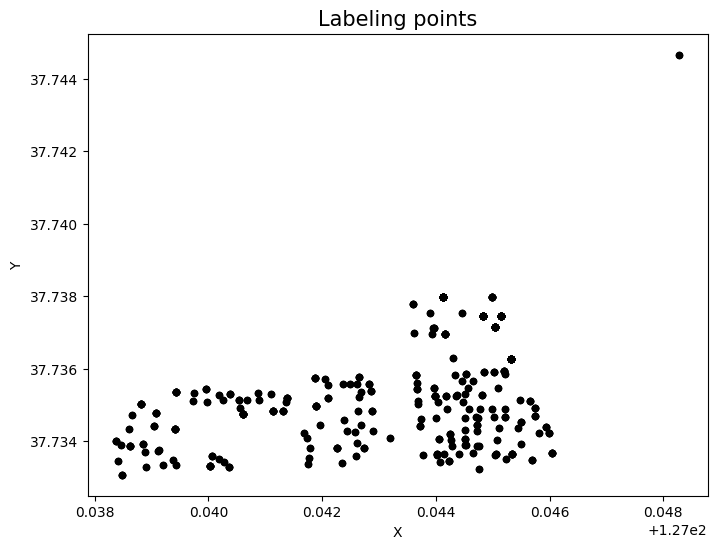

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=20,color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Labeling points",fontsize=15)
for i in range(len(X)):
    plt.scatter(X[i], Y[i], color="black", s=20)

plt.show()


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.3/8.3 MB 13.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 42.5/42.5 MB 5.7 MB/s eta 0:00:00


c:\Users\syc50\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\syc50\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\syc50\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\syc50\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'Elbow curve')

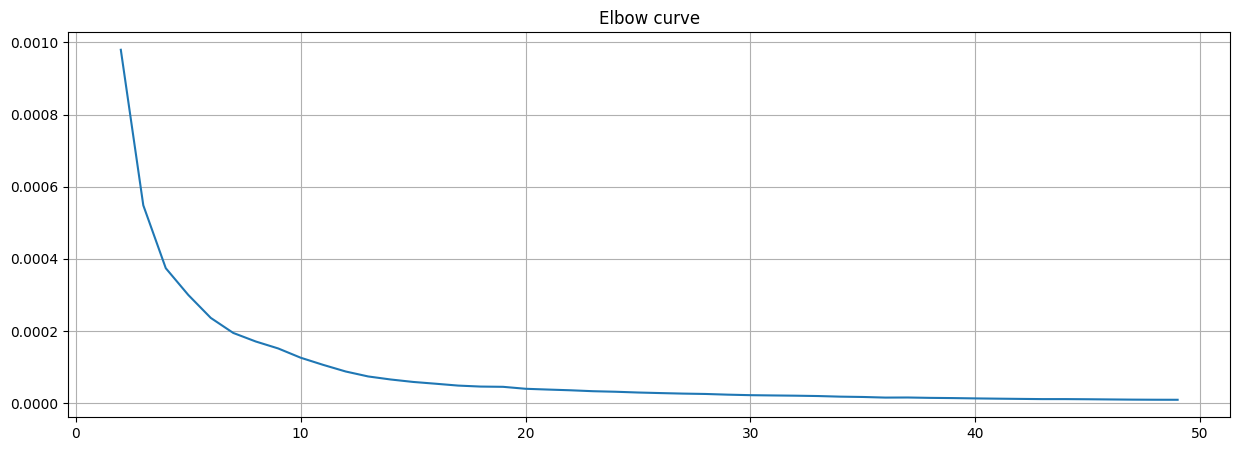

In [25]:
from sklearn.cluster import KMeans
distortions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distortions)
plt.grid(True)
plt.title('Elbow curve')

c:\Users\syc50\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[127.0421087  127.0420492  127.0418762  127.0418762  127.0418762
 127.0421087   37.73556372 127.0420492   37.73573267 127.0418762
  37.7357485  127.0418762   37.7357485  127.0418762   37.7357485 ]
[127.044461   127.044824   127.044824   127.044824   127.044824
 127.044824   127.044824   127.044824   127.044824   127.044824
 127.044824   127.044824   127.044824   127.044824   127.044824
 127.044824   127.044824   127.044824   127.044824   127.044824
 127.044824   127.044461    37.73752697 127.044824    37.73745025
 127.044824    37.73745025 127.044824    37.73745025 127.044824
  37.73745025 127.044824    37.73745025 127.044824    37.73745025
 127.044824    37.73745025 127.044824    37.73745025 127.044824
  37.73745025 127.044824    37.73745025 127.044824    37.73745025
 127.044824    37.73745025 127.044824    37.73745025 127.044824
  37.73745025 127.044824    37.73745025 127.044824    37.73745025
 127.044824    37.73745025 127.044824    37.73745025 127.044824
  37.73745025 127.044824   

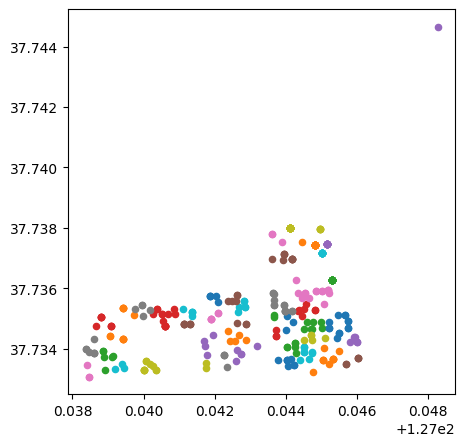

In [26]:
#K-means 결과
K = 50
model = KMeans(n_clusters = K)
model.fit(Z)

plt.figure(figsize=(5,5))
for k in range(K):
    plt.scatter(Z[model.labels_ ==k,0], Z[model.labels_==k,1],s=20)
    Ck = []
    Ck = np.append(Z[model.labels_ ==k,0], Z[model.labels_==k])
    print(Ck)


In [27]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
meanshift = MeanShift(bandwidth=0.002)
cluster_labels = meanshift.fit_predict(Z)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1 2]


In [28]:
bandwidth = estimate_bandwidth(Z)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.002


In [29]:
best_bandwidth = estimate_bandwidth(Z)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(Z)
print('best bandwidth cluster labels 유형:',np.unique(cluster_labels))

best bandwidth cluster labels 유형: [0 1 2]


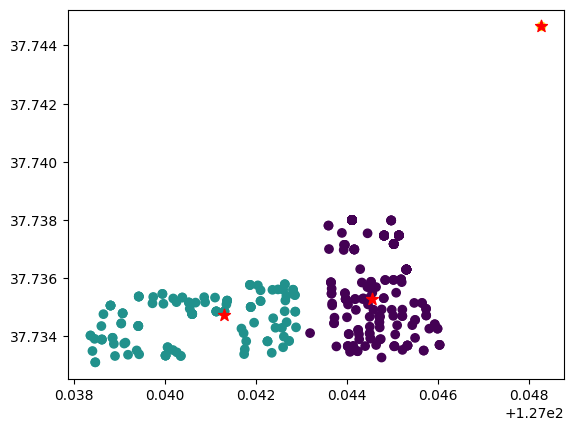

In [30]:
#MeanShift 결과
mshclust=MeanShift(bandwidth=0.002).fit(Z)
mshclust
labels = mshclust.labels_
centers = mshclust.cluster_centers_

plt.scatter(Z[:,0], Z[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], marker='*', color="r",s=80 )
plt.show()

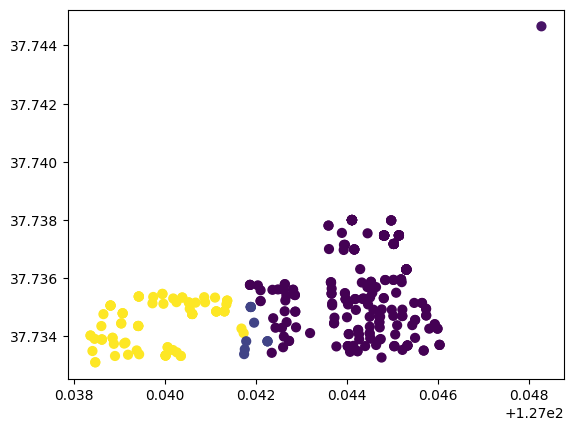

In [31]:
#GMM 결과
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=30).fit(Z)
labels = gmm.predict(Z)
plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=40, cmap='viridis')


In [32]:
probs = gmm.predict_proba(Z)
print(probs[:5].round(3))

[[0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.011 0.079 0.003 0.082 0.011 0.008 0.023 0.    0.006 0.004 0.111 0.025
  0.022 0.083 0.004 0.088 0.002 0.012 0.012 0.008 0.005 0.07  0.011 0.025
  0.092 0.002 0.134 0.025 0.034 0.007]]


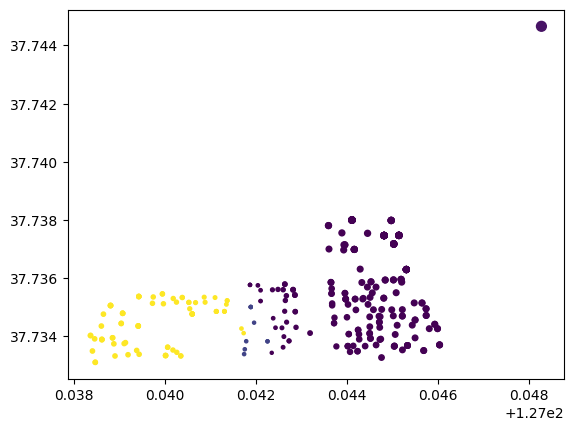

In [33]:
size = 50 * probs.max(1) # square는 차이점을 강조
plt.scatter(Z[:, 0], Z[:, 1], c=labels, cmap='viridis', s=size);

Text(0, 0.5, '특성 1')

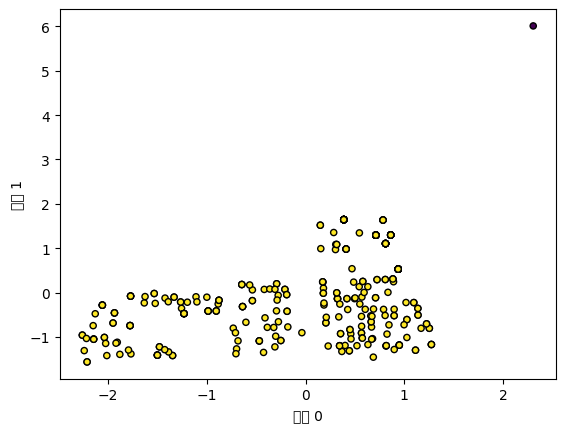

In [34]:
#DBSCAN 결과
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
scaler.fit(Z)
Z_scaled = scaler.transform(Z)

dbscan = DBSCAN(eps=0.7, min_samples=2)
clusters = dbscan.fit_predict(Z_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=clusters, cmap='viridis', s=20, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")